# Twitter Sentiment Analysis for Organic cow milk

Business Goal : The goal of this project is to extract all tweets from Twitter containing the keyword "Organic Milk" and understand if the sentiment of the tweet falls under positive, negative or neutral category for Organic milk product

This notebook is the sentiment analysis section split from the main CA2 to redue the space

In [50]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
# Authentication
consumerKey = "dlmSwyiJRNgL5a5y7tD0Zjxgr"
consumerSecret = "tMxnFrRs1088cqIjlDnaG4RUT9xs1AXd3Mpwvv3TNaUxUsnx0D"
accessToken = "1518310189962780672-fpocSf7XDjjl3LctVad2pCDEXnoF0a"
accessTokenSecret = "GWYlpl3UuYg4TQ003BeL3FIqpDsV9jptyPRenF0PuGGr2"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [52]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: organic milk
Please enter how many tweets to analyze: 500000


In [53]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  879
positive number:  469
negative number:  137
neutral number:  273


In [5]:
tweet_list

,0
0,"RT @AnimalJustice: As #MothersDay approaches, ..."
1,"RT @AnimalJustice: As #MothersDay approaches, ..."
2,"RT @AnimalJustice: As #MothersDay approaches, ..."
3,"RT @AnimalJustice: As #MothersDay approaches, ..."
4,"RT @AnimalJustice: As #MothersDay approaches, ..."
...,...
867,@UnfilteredWMD @FrankTarot @theveganting This ...
868,@librtybibberty Breastfeed and take care of yo...
869,Exactly. Growing up on cheap discounted foods ...
870,RT @shawtyaintshit: Grass feeding my future wi...


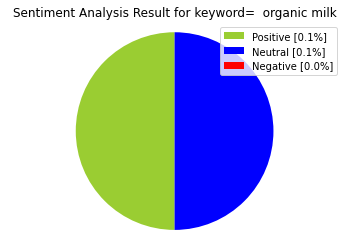

In [6]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
#Remove the duplicate values in the tweet
tweet_list.drop_duplicates(inplace = True)

# Extracting text values from the tweet

In [8]:
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values 
text_positive = positive_list[0].values 
text_negative = negative_list[0].values

In [9]:
#copy the tweet_list to tw_list dataframe
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,"RT @AnimalJustice: As #MothersDay approaches, ...","RT @AnimalJustice: As #MothersDay approaches, ..."
5,#barumilk organic goat (sorry) whole milk.Per ...,#barumilk organic goat (sorry) whole milk.Per ...
6,So Delicious Dairy-Free Unsweetened Coconut Mi...,So Delicious Dairy-Free Unsweetened Coconut Mi...
12,"As #MothersDay approaches, our hearts go out t...","As #MothersDay approaches, our hearts go out t..."
13,Todays special\nBuy box of 12 organic coconut ...,Todays special\nBuy box of 12 organic coconut ...
...,...,...
864,RT @IrohJacked: I don’t know why people say th...,RT @IrohJacked: I don’t know why people say th...
865,Santoor Sandalwood and Almond milk Organic Sof...,Santoor Sandalwood and Almond milk Organic Sof...
867,@UnfilteredWMD @FrankTarot @theveganting This ...,@UnfilteredWMD @FrankTarot @theveganting This ...
868,@librtybibberty Breastfeed and take care of yo...,@librtybibberty Breastfeed and take care of yo...


In [10]:
tweet_list

,0,text
0,"RT @AnimalJustice: As #MothersDay approaches, ...","RT @AnimalJustice: As #MothersDay approaches, ..."
5,#barumilk organic goat (sorry) whole milk.Per ...,#barumilk organic goat (sorry) whole milk.Per ...
6,So Delicious Dairy-Free Unsweetened Coconut Mi...,So Delicious Dairy-Free Unsweetened Coconut Mi...
12,"As #MothersDay approaches, our hearts go out t...","As #MothersDay approaches, our hearts go out t..."
13,Todays special\nBuy box of 12 organic coconut ...,Todays special\nBuy box of 12 organic coconut ...
...,...,...
864,RT @IrohJacked: I don’t know why people say th...,RT @IrohJacked: I don’t know why people say th...
865,Santoor Sandalwood and Almond milk Organic Sof...,Santoor Sandalwood and Almond milk Organic Sof...
867,@UnfilteredWMD @FrankTarot @theveganting This ...,@UnfilteredWMD @FrankTarot @theveganting This ...
868,@librtybibberty Breastfeed and take care of yo...,@librtybibberty Breastfeed and take care of yo...


In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @AnimalJustice: As #MothersDay approaches, ...",as mothersday approaches our hearts go out ...
5,#barumilk organic goat (sorry) whole milk.Per ...,barumilk organic goat sorry whole milk per ...
6,So Delicious Dairy-Free Unsweetened Coconut Mi...,so delicious dairy free unsweetened coconut mi...
12,"As #MothersDay approaches, our hearts go out t...",as mothersday approaches our hearts go out t...
13,Todays special\nBuy box of 12 organic coconut ...,todays special buy box of 12 organic coconut m...
14,RT @pauljimerson: Mom’s Organic Milk https://t...,mom s organic milk
15,Mom’s Organic Milk https://t.co/kOSAjWH4zi,mom s organic milk
16,@dezgoldie Dude try the wild goat milk organic...,dude try the wild goat milk organic cacao sm...
17,Eco Health Solid Shampoo Bar - Natural Shampoo...,eco health solid shampoo bar natural shampoo...
18,RT @GAPSyndrome: There is a consumer movement ...,there is a consumer movement in the western w...


In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"RT @AnimalJustice: As #MothersDay approaches, ...",as mothersday approaches our hearts go out ...,0.000000,0.000000,neutral,0.00,1.000,0.000,0.0000
5,#barumilk organic goat (sorry) whole milk.Per ...,barumilk organic goat sorry whole milk per ...,-0.150000,0.700000,negative,0.14,0.860,0.000,-0.0772
6,So Delicious Dairy-Free Unsweetened Coconut Mi...,so delicious dairy free unsweetened coconut mi...,0.600000,0.733333,positive,0.00,0.726,0.274,0.8204
12,"As #MothersDay approaches, our hearts go out t...",as mothersday approaches our hearts go out t...,0.000000,0.000000,neutral,0.00,1.000,0.000,0.0000
13,Todays special\nBuy box of 12 organic coconut ...,todays special buy box of 12 organic coconut m...,0.378571,0.685714,positive,0.00,0.750,0.250,0.7184
14,RT @pauljimerson: Mom’s Organic Milk https://t...,mom s organic milk,0.000000,0.000000,neutral,0.00,1.000,0.000,0.0000
15,Mom’s Organic Milk https://t.co/kOSAjWH4zi,mom s organic milk,0.000000,0.000000,neutral,0.00,1.000,0.000,0.0000
16,@dezgoldie Dude try the wild goat milk organic...,dude try the wild goat milk organic cacao sm...,0.100000,0.400000,neutral,0.00,1.000,0.000,0.0000
17,Eco Health Solid Shampoo Bar - Natural Shampoo...,eco health solid shampoo bar natural shampoo...,0.216667,0.416667,positive,0.00,0.796,0.204,0.4767
18,RT @GAPSyndrome: There is a consumer movement ...,there is a consumer movement in the western w...,0.041667,0.216667,positive,0.00,0.889,0.111,0.3612


In [13]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [14]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [15]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,360,54.71
neutral,197,29.94
negative,101,15.35


In [16]:
#move the sentiment values into a pc dataframe
pc = count_values_in_column(tw_list,"sentiment")

In [17]:
#display the first 5 records of pc
pc.head()

,Total,Percentage
positive,360,54.71
neutral,197,29.94
negative,101,15.35


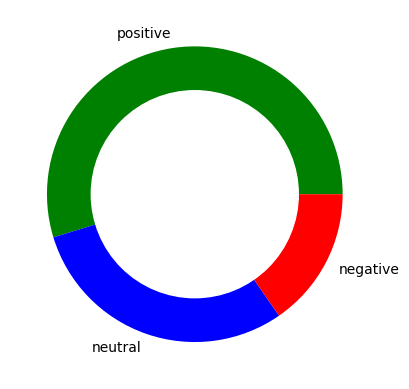

In [18]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [19]:
#display the tweet dataframe
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"RT @AnimalJustice: As #MothersDay approaches, ...",as mothersday approaches our hearts go out ...,0.000000,0.000000,neutral,0.00,1.000,0.000,0.0000
5,#barumilk organic goat (sorry) whole milk.Per ...,barumilk organic goat sorry whole milk per ...,-0.150000,0.700000,negative,0.14,0.860,0.000,-0.0772
6,So Delicious Dairy-Free Unsweetened Coconut Mi...,so delicious dairy free unsweetened coconut mi...,0.600000,0.733333,positive,0.00,0.726,0.274,0.8204
12,"As #MothersDay approaches, our hearts go out t...",as mothersday approaches our hearts go out t...,0.000000,0.000000,neutral,0.00,1.000,0.000,0.0000
13,Todays special\nBuy box of 12 organic coconut ...,todays special buy box of 12 organic coconut m...,0.378571,0.685714,positive,0.00,0.750,0.250,0.7184


In [20]:
#disp;ay the shape of tweet dataframe
tw_list.shape

(658, 9)

#  Data Pre Processing

In [21]:
# Store the column of the dataframe named as "text"
X = tw_list['text']

# Display the value "X"
print(X)

0       as  mothersday approaches  our hearts go out ...
5       barumilk organic goat  sorry  whole milk per ...
6      so delicious dairy free unsweetened coconut mi...
12     as  mothersday approaches  our hearts go out t...
13     todays special buy box of 12 organic coconut m...
                             ...                        
864     i don t know why people say they hate twitter...
865    santoor sandalwood and almond milk organic sof...
867          this is by far not industry standard for...
868      breastfeed and take care of your nipples wit...
869    exactly  growing up on cheap discounted foods ...
Name: text, Length: 658, dtype: object


In [22]:
# Store the column of the dataframe named as  "sentiment"
y = tw_list['sentiment']

# Display the column of the dataframe named as "sentiment"
print(y)

0       neutral
5      negative
6      positive
12      neutral
13     positive
         ...   
864    negative
865     neutral
867     neutral
868    positive
869    positive
Name: sentiment, Length: 658, dtype: object


# Clean your text data

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [25]:
import re

cleaned_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters

for i in range(len(X)):
    tweet = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    tweet = tweet.lower().split()
    tweet = [stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
    tweet = ' '.join(tweet)
    cleaned_data.append(tweet)

In [26]:
# Display the cleaned_data
cleaned_data

['mothersday approach heart go million dairi cow whose babi rip side amp kil',
 'barumilk organ goat sorri whole milk per veri intenditori',
 'delici dairi free unsweeten coconut milk beverag avail oz contain organ altern dairi soy milk',
 'mothersday approach heart go million dairi cow whose babi rip side',
 'today special buy box organ coconut milk ml wholesal price get free organ coconut milk',
 'mom organ milk',
 'mom organ milk',
 'dude tri wild goat milk organ cacao smoothi',
 'eco health solid shampoo bar natur shampoo bar organ coconut milk jojoba oil cocoa butter suitabl',
 'consum movement western world real milk natur breed cow fed organ pastur http',
 'consum movement western world real milk natur breed cow fed organ pastu',
 'featur urthbox product vote best thai green curri epicuri mekhala live delici thai green curr',
 'food contain nutrient us need unless eat orga',
 'good morn west villag today flavor origin chocol tropic touch honey coconut lime',
 'yerel organik kolo

In [27]:
print(y)

0       neutral
5      negative
6      positive
12      neutral
13     positive
         ...   
864    negative
865     neutral
867     neutral
868    positive
869    positive
Name: sentiment, Length: 658, dtype: object


In [28]:
# Collect all columns into dataframe named as sentiment_ordering
sentiment_ordering = ['negative', 'neutral', 'positive']

# store all values into column named as "y"
y = y.apply(lambda x: sentiment_ordering.index(x))

In [29]:
y.head()

0     1
5     0
6     2
12    1
13    2
Name: sentiment, dtype: int64

# Bag of words using count vectorizer

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate an object cv by calling a method named as CountVectorzer()
cv    = CountVectorizer(max_features = 3000, stop_words = ['milk price', 'consumer', 'producer'])

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(cleaned_data).toarray()

# Display the rows and colums
X_fin.shape

C:\ProgramData\Anaconda3\envs\EDADataprep\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['milk', 'price'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(658, 2186)

In [31]:
X_fin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model = MultinomialNB()

In [33]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size = 0.3)

In [34]:
# Train the model by calling a method fit()
model.fit(X_train,y_train)

MultinomialNB()

In [35]:
# Call predict() method
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.45      0.45      0.45        29
           1       0.64      0.54      0.59        67
           2       0.74      0.82      0.78       102

    accuracy                           0.67       198
   macro avg       0.61      0.60      0.61       198
weighted avg       0.67      0.67      0.67       198



# Feature Generation using TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an object 'tf' by calling a method TfidfVectorizer()
tfidf = TfidfVectorizer(max_features = 3000, stop_words = ['milk price', 'consumer', 'producer'])

# Train the dataset by calling a method fit_tranform() 
X_tfidf = tfidf.fit_transform(cleaned_data).toarray()

C:\ProgramData\Anaconda3\envs\EDADataprep\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['milk', 'price'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [39]:
X_tfidf 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model_tdidf = MultinomialNB()

In [41]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3)

In [42]:
# Train the model by calling a method fit()
model_tdidf.fit(X_train, y_train)

MultinomialNB()

In [43]:
# Call predict() method
y_pred = model_tdidf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.68      0.25      0.36        53
           2       0.61      0.98      0.75       111

    accuracy                           0.62       198
   macro avg       0.43      0.41      0.37       198
weighted avg       0.52      0.62      0.52       198



C:\ProgramData\Anaconda3\envs\EDADataprep\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\EDADataprep\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\EDADataprep\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Reference:


https://medium.com/swlh/tweet-sentiment-analysis-using-python-for-complete-beginners-4aeb4456040 Sample code reference-https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb